<div style="background-color: #ffffff; color: #000000; padding: 30px;">
<img src="../media/images/kisz_logo.png" width="192" height="69" align="right" style="margin-right: 50px; margin-bottom:50px;"> 
<h1> Time Series Analysis and Forecasting
</div>



<div style="background-color: #f6a800; color: #ffffff; padding: 10px;">
<h2> Part A: Foundations & Data Exploration
<h2> Notebook 2. Visualizing Time Series
</div>

In this notebook, we will learn how to visualize time series data to identify patterns, trends, seasonality, and potential anomalies. Visualization is a key first step in understanding the structure of a dataset before applying forecasting or machine learning models.



In [ ]:
# packages import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import nb_config


# data loading
df = pd.read_parquet('../data/cdc_monthly_regional_air_temp_D.parquet')
df = df.set_index('Datum')
for col in df.columns:
  df[col] = df[col].astype(float)

bb_ser = df['Brandenburg/Berlin']

# Set the style for the plots
sns.set_theme(style="whitegrid")

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>1. Line Plots of Time Series
</div>

Line plots are the most basic and effective way to visualize a time series. They help us observe trends, seasonality, and unusual spikes or drops.

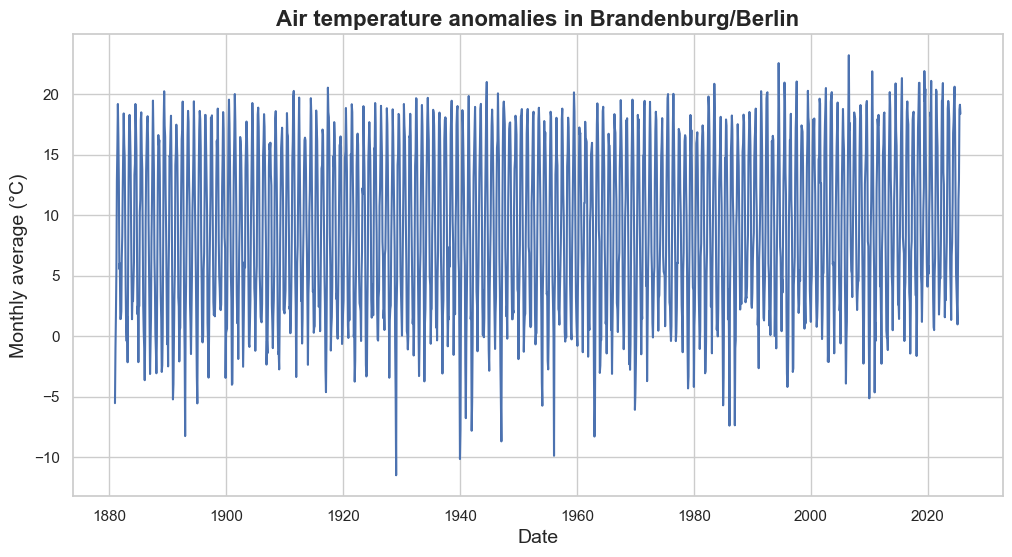

In [2]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(bb_ser)

# Add title and labels
plt.title("Air temperature anomalies in Brandenburg/Berlin", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Monthly average (°C)", fontsize=14)

# Show plot
plt.show()

Because we have data from a wide range of time, it's not so easy to notice any patterns or tendences. Let's focus on a smaller period of time, like the last 15 years...

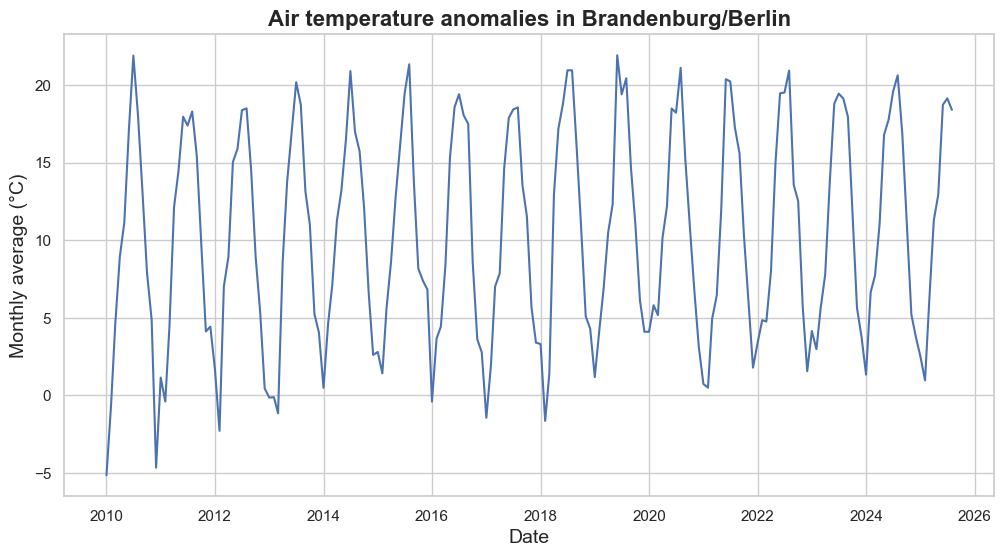

In [3]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(bb_ser["2010":])

# Add title and labels
plt.title("Air temperature anomalies in Brandenburg/Berlin", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Monthly average (°C)", fontsize=14)


# Show plot
plt.show()

Much better! We can get already a feeling about the data.

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>2. Using Rolling windows and confidence intervals
</div>


When analyzing time series data, short-term fluctuations can make it difficult to see overall patterns. Rolling windows help by smoothing the data, calculating statistics (mean, median, std, etc.) over a moving window.

This can be combined with confidence intervals to visualize the uncertainty around the smoothed estimate.

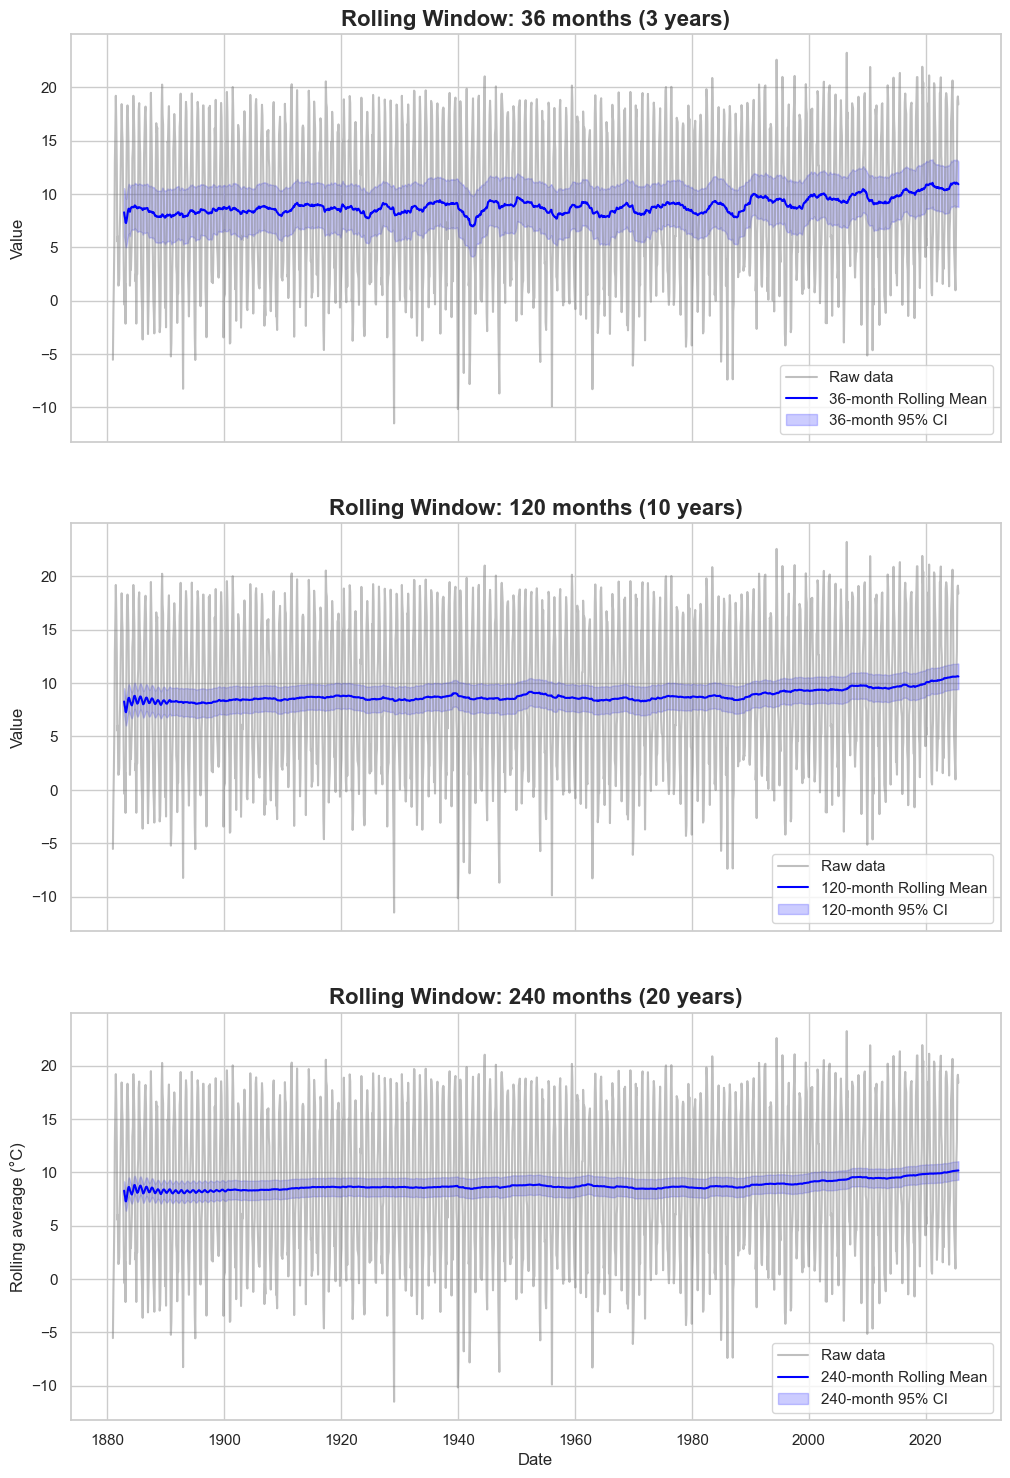

In [4]:
# Try are going to try different rolling windows to see trend
windows = [36, 120, 240]  # in months

# Explore

fig, axes = plt.subplots(len(windows), 1, figsize=(12, 6 * len(windows)), sharex=True)

for i, window in enumerate(windows):
    rolling_mean = bb_ser.rolling(window=window, min_periods=24).mean()
    rolling_std = bb_ser.rolling(window=window, min_periods=24).std()
    se = rolling_std / np.sqrt(window)
    ci_upper = rolling_mean + 1.96 * se
    ci_lower = rolling_mean - 1.96 * se


    axes[i].plot(bb_ser, color="gray", alpha=0.5, label="Raw data")
    axes[i].plot(bb_ser.index, rolling_mean, color="blue", label=f"{window}-month Rolling Mean")
    axes[i].fill_between(bb_ser.index, ci_lower, ci_upper, color="blue", alpha=0.2, label=f"{window}-month 95% CI")
    axes[i].set_title(f"Rolling Window: {window} months ({int(window/12)} years)", fontsize=16, fontweight="bold")
    axes[i].set_ylabel("Value")
    axes[i].legend()


plt.xlabel("Date")
plt.ylabel("Rolling average (°C)")
plt.legend()
plt.show()

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>3. Seasonal plot lines, Box and Violin lines
</div>

When working with time series data, it’s often useful to explore patterns over time beyond simple line plots. Seasonal plots, box plots, and violin plots can help uncover trends, seasonal variations, and the distribution of values.

### Seasonal Plots

A seasonal plot visualizes the values of a time series grouped by a repeating period, such as months or weekdays. This helps to identify seasonal patterns.

In [5]:
bb_ser.index.year

Index([1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881,
       ...
       2024, 2024, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='Datum', length=1736)

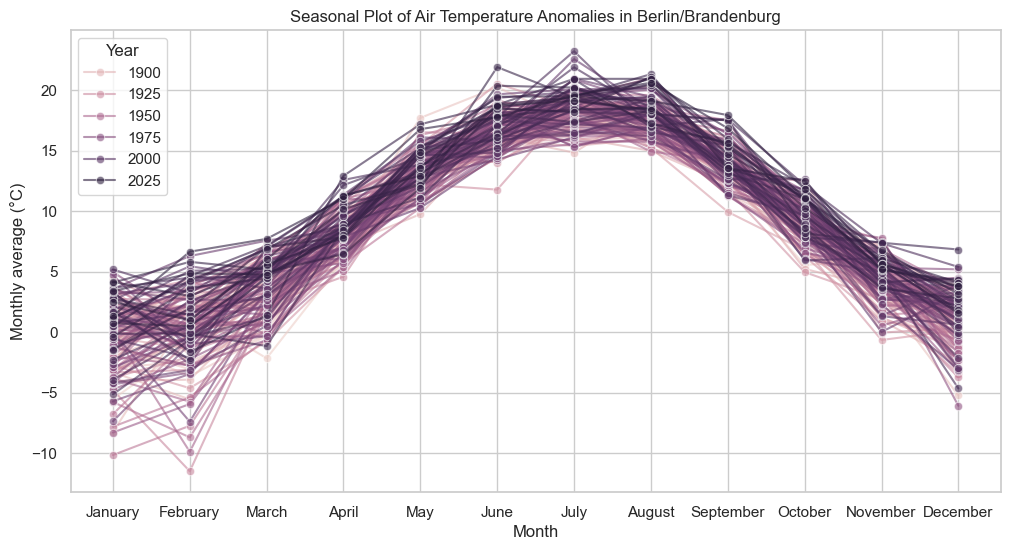

In [6]:
# Seasonal plot using seaborn
plt.figure(figsize=(12,6))
sns.lineplot(x=bb_ser.index.month_name(), y=bb_ser, hue=bb_ser.index.year, marker='o', alpha = 0.6)

plt.xlabel('Month')
plt.ylabel('Monthly average (°C)')
plt.title('Seasonal Plot of Air Temperature Anomalies in Berlin/Brandenburg')
plt.legend(title='Year', loc='upper left')
plt.show()

### Box Plot

Seaborn’s **boxplot** is perfect for summarizing monthly distributions and we can already see some outliers:

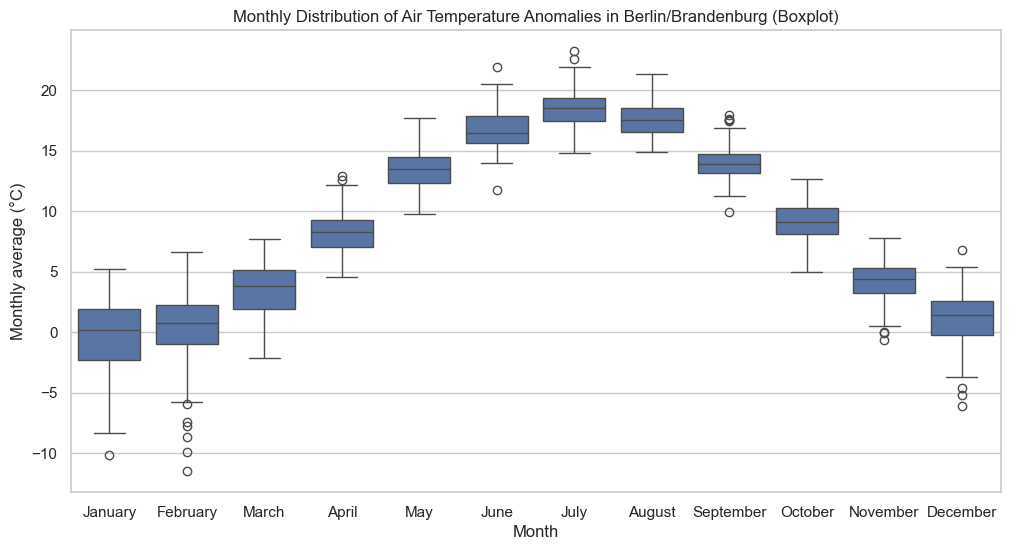

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x=bb_ser.index.month_name(), y=bb_ser)

plt.xlabel('Month')
plt.ylabel('Monthly average (°C)')
plt.title('Monthly Distribution of Air Temperature Anomalies in Berlin/Brandenburg (Boxplot)')
plt.show()

Box plots highlight medians, quartiles, and outliers for each month.

### Violin Plot

Seaborn’s **violinplot** shows the full distribution for each month:

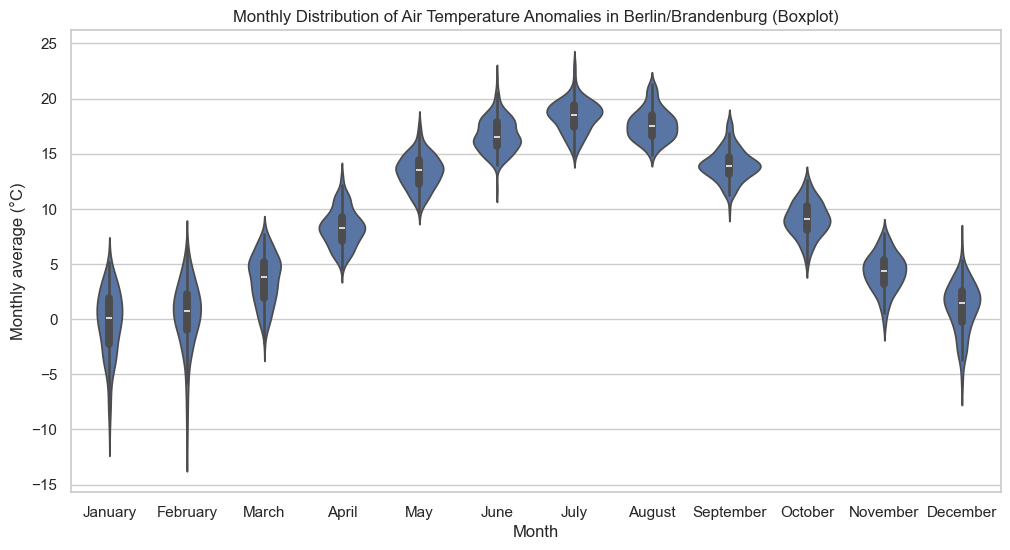

In [8]:
plt.figure(figsize=(12,6))

sns.violinplot(x=bb_ser.index.month_name(), y=bb_ser)

plt.xlabel('Month')
plt.ylabel('Monthly average (°C)')
plt.title('Monthly Distribution of Air Temperature Anomalies in Berlin/Brandenburg (Boxplot)')
plt.show()

Violin plots combine the features of box plots with a density estimate, revealing the shape of the distribution.

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>4. Polar plots and heat maps
</div>

**Polar plots** are ideal for visualizing cyclical data such as monthly or daily trends in a circular layout.

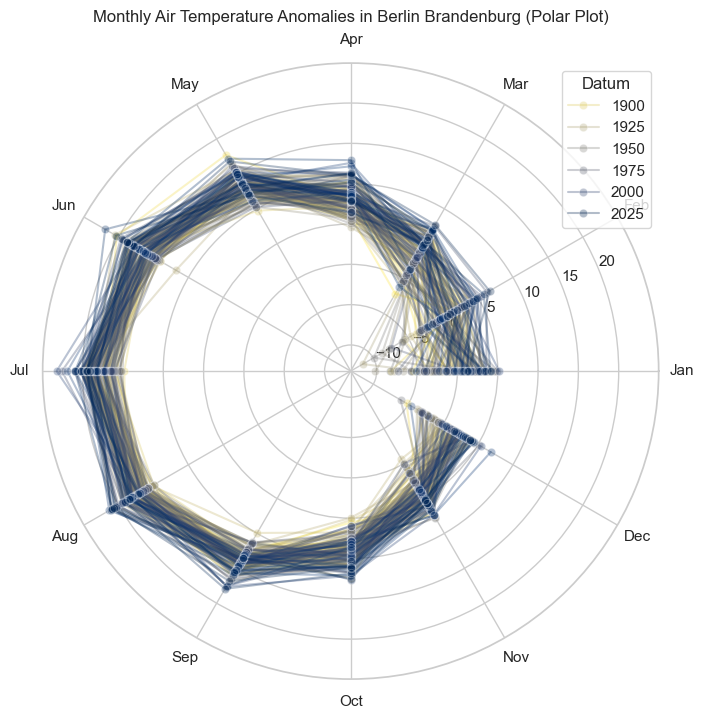

In [9]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

sns.lineplot(x= (2 * np.pi * (bb_ser.index.month-1)/12), y=bb_ser, marker='o', linestyle='-', hue=bb_ser.index.year, palette="cividis_r", alpha=0.3, ax=ax)

ax.set_xticks(2 * np.pi * (bb_ser.index.month.unique()-1)/12)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_title('Monthly Air Temperature Anomalies in Berlin Brandenburg (Polar Plot)', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.show()

This circular plot highlights seasonal peaks and troughs in a visually intuitive way.

### Heat maps

Heat maps show the intensity of values across two dimensions, such as month vs year, making patterns easy to spot.

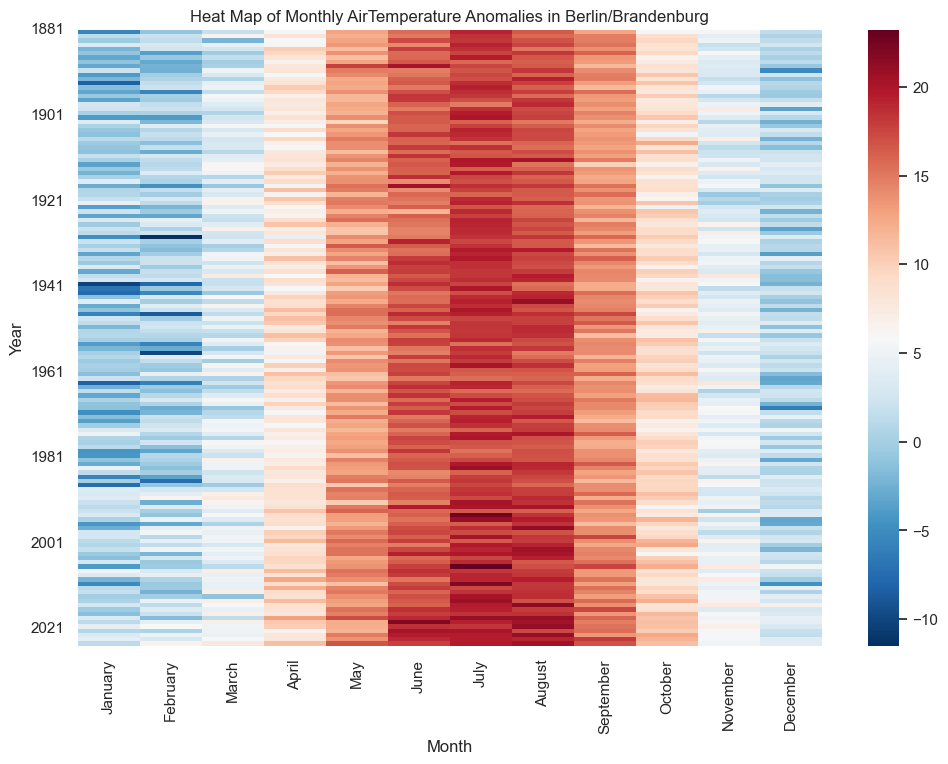

In [12]:
# Pivot data for heat map: months as columns, years as rows
bb_df = pd.DataFrame([bb_ser.index.month, bb_ser.index.year, bb_ser]).T
bb_df.columns = ['Month', 'Year', 'Value']
heatmap_data = bb_df.pivot(columns='Month', index='Year', values='Value')[:'2025']
heatmap_data.columns = bb_ser.index.month_name().unique()

plt.figure(figsize=(12,8))

sns.heatmap(heatmap_data, annot=False, cmap='RdBu_r')

years = np.arange(1881, 2024)
yticks = np.arange(0, len(years), 20)  # positions
ytick_labels = years[yticks] 

plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(yticks, ytick_labels)
plt.title('Heat Map of Monthly AirTemperature Anomalies in Berlin/Brandenburg')
plt.show()


<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>5. Autocorrelation and Partial Autocorrelation
</div>

Autocorrelation (ACF) measures how correlated a time series is with its past values at different lags. Partial autocorrelation (PACF) isolates the effect of each lag. These plots are essential for identifying patterns and selecting model parameters in ARIMA or other statistical methods.

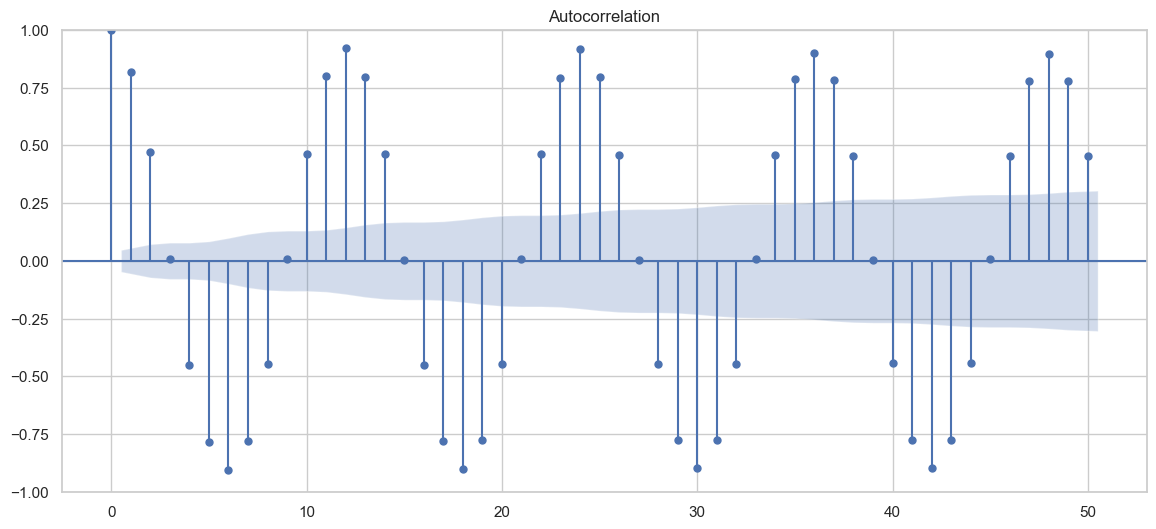

In [25]:
fig = plot_acf(bb_ser, lags=50)
fig.set_size_inches(14, 6)
plt.show()

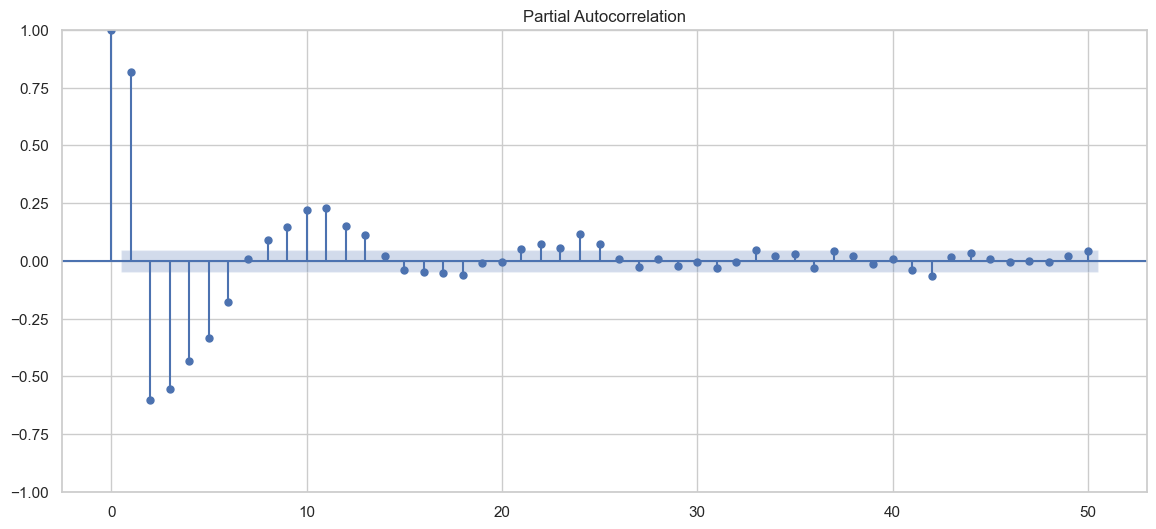

In [24]:
fig = plot_pacf(bb_ser, lags=50)
fig.set_size_inches(14, 6)
plt.show()